In [204]:
import numpy as np
import pylab as pl
import scipy.stats as ss
from time import time

In [152]:
# "Anatomy" parameters
N_bundle = 5 # number of bundle or connection in the matrix
order_max_over_min = 3 # x/y assuming biggest bundle has 10^x tract and smallest non-zero 10^y tract

In [153]:
def sample_anatomy(N_bundle, order_max_over_min):
    orders = np.linspace(1, order_max_over_min, N_bundle, endpoint=True)
    return 10**orders

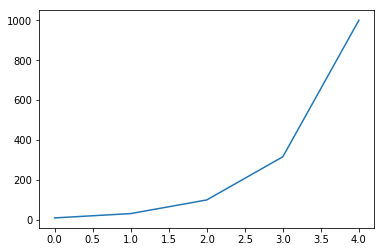

In [154]:
anatomy = sample_anatomy(N_bundle, order_max_over_min)
pl.figure()
pl.plot(anatomy)
pl.show()

In [156]:
# "Tractography" parameters
N_tract = 10**6 # number of streamline
noise_level = 0.01 # multiplicative noise: observe_tc = gt_tc*(1+noise*epsillon) where epsillon ~ N(0,1)

In [157]:
# create the random variable with anatomy as prior
def build_tractography_dist(anatomy):
    return ss.rv_discrete(name='custm', values=(range(len(anatomy)), anatomy/np.sum(anatomy)))

In [158]:
# samples from a bundle size distribution
def sample_tractography(dist, N):
    return dist.rvs(size=N)

In [159]:
# get noiseless tract count
def tractcount_from_sample(tracto, N):
    tmp_tc, tmp_bins = np.histogram(tracto, bins=range(N+1))
    return tmp_tc, tmp_bins[:-1]

In [160]:
# one example
tract_dist = build_tractography_dist(anatomy)
tracto_gt = sample_tractography(tract_dist, N_tract)
tc_gt, bundle_number = tractcount_from_sample(tracto_gt, len(anatomy)) # or N_bundle

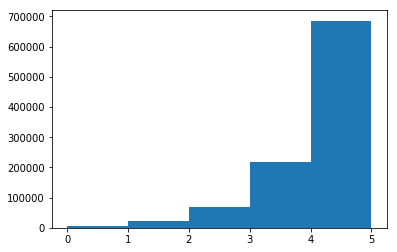

In [161]:
pl.figure()
pl.hist(tracto_gt, bins=range(N_bundle+1))
pl.show()

In [162]:
# add multiplicative noise
def tractography_noise(tc, noise_level):
    noise = np.random.randn(len(tc))
    noisy_tc = tc * (1 + noise_level*noise) # non integer
    return noisy_tc

In [163]:
# round to integer and normalize
def round_and_normalize_tc(noisy_tc):
    tmp = np.round(noisy_tc)
    normalized_tc = tmp / np.sum(tmp)
    return tmp.astype(np.int), normalized_tc

In [164]:
noisy_tc = tractography_noise(tc_gt, noise_level)
tc, norm_tc = round_and_normalize_tc(noisy_tc)

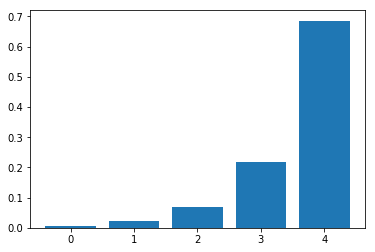

In [165]:
pl.figure()
pl.bar(bundle_number, norm_tc)
# pl.scatter(bundle_number, tc_gt/np.sum(tc_gt))
pl.show()

In [221]:
st = time()
for i in range(250):
    tracto_gt = sample_tractography(tract_dist, N_tract)
    tc_gt, bundle_number = tractcount_from_sample(tracto_gt, len(anatomy)) # or N_bundle
    data[:, i] = tc_gt/N_tract
ed = time()
print(ed-st)

12.250143766403198


In [222]:
rng = np.random.default_rng()

In [223]:
st = time()
for i in range(250):
    tracto_gt = rng.multinomial(N_tract, anatomy/np.sum(anatomy), size=1)
    tc_gt, bundle_number = tractcount_from_sample(tracto_gt[0], len(anatomy)) # or N_bundle
    data[:, i] = tc_gt/N_tract
ed = time()
print(ed-st)

0.042438507080078125


In [224]:
st = time()
tracto_gt = rng.multinomial(N_tract, anatomy/np.sum(anatomy), size=250)
for i in range(250):
    tc_gt, bundle_number = tractcount_from_sample(tracto_gt[i], len(anatomy)) # or N_bundle
    data[:, i] = tc_gt/N_tract
ed = time()
print(ed-st)

0.027977943420410156


In [218]:
tracto_gt.shape

(1, 5)

In [166]:
NN = 10000
data = np.zeros((len(anatomy), NN))
for i in range(NN):
    tracto_gt = sample_tractography(tract_dist, N_tract)
    tc_gt, bundle_number = tractcount_from_sample(tracto_gt, len(anatomy)) # or N_bundle
    data[:, i] = tc_gt/N_tract

In [167]:
GT = anatomy/np.sum(anatomy)

In [168]:
multiplier = (data / GT[:, None]) - 1

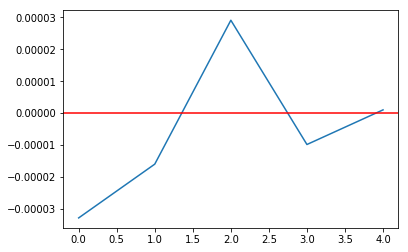

In [169]:
pl.plot(multiplier.mean(axis=1))
pl.axhline(0, color='red')

In [180]:
data[0].mean()

0.0068591888

In [201]:
GT

array([0.00685941, 0.02169137, 0.06859414, 0.21691371, 0.68594137])

In [188]:
data[0].var()

6.83896635456e-09

In [189]:
GT[0]*(1-GT[0]) / N_tract

6.812362154117648e-09

In [191]:
multiplier[0].mean()

-3.278859971125414e-05

In [192]:
multiplier[0].var()

0.00014535048083746526

In [193]:
GT[0]*(1-GT[0]) / (N_tract * GT[0]**2)

0.00014478505426185218

For multinomial with $n$ trial and $k$ classes with probability $p_1,...,p_k$  
$E[x_i] = n p_i$  
$var[x_i] = n p_i (1-p_i)$  

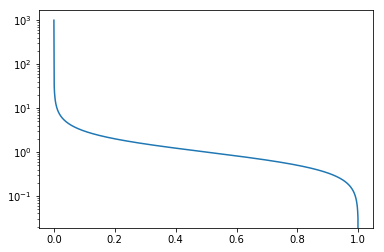

In [202]:
x = np.linspace(1e-6, 1, 1000, endpoint=True)
# x = np.linspace(1e-6, 0.1, 1000, endpoint=True)
y = np.sqrt(x*(1-x))/x
pl.semilogy(x,y)

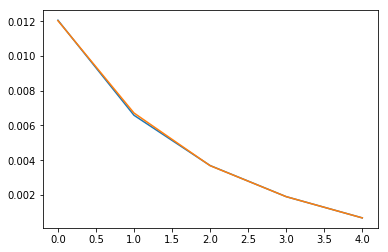

In [195]:
pl.plot(multiplier.std(axis=1))
pl.plot(np.sqrt(GT*(1-GT)/N_tract)/GT)

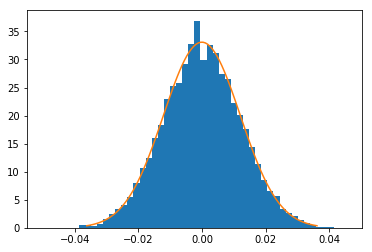

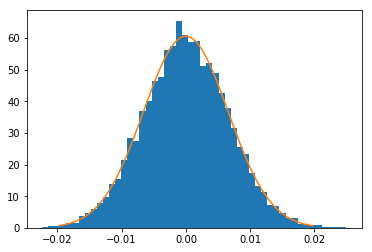

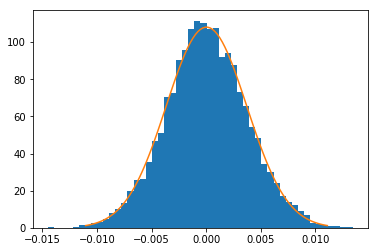

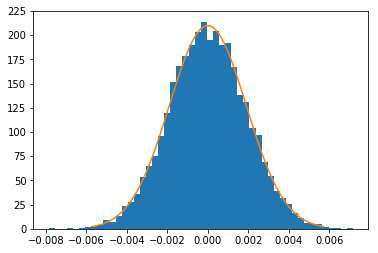

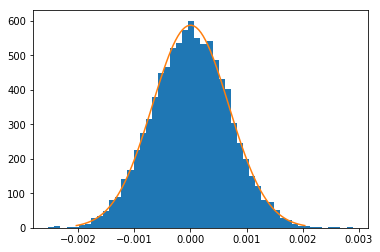

In [171]:
for i in range(len(anatomy)):
    toplot = (data[i,:]/GT[i]) - 1
    pl.figure()
    pl.hist(toplot, 50, density=True)
    mu = toplot.mean()
    sigma = toplot.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pl.plot(x, ss.norm.pdf(x, mu, sigma))

In [3]:
# tract count theoretical distribution
tc_rv = ss.expon() # default because we will rescale by total fibers

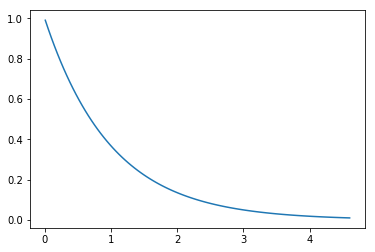

In [5]:
x = np.linspace(ss.expon.ppf(0.01), ss.expon.ppf(0.99), 100)
pl.figure()
pl.plot(x, tc_rv.pdf(x))
pl.show()

In [ ]:
# tractography
N_bundle
N_tract = 1e